# Feature engineering


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Principal Component Analysis
import requests

## Read and Understand the data
The dataset is `airlines_data.xlsx` file hosted on IBM Cloud  object. 

In [5]:
# read the data into pandas dataframe
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/airlines_data.xlsx'
filename='airlines_data.xlsx'

response=requests.get(url)
with open(filename,'wb') as f:
    f.write(response.content)

data=pd.read_excel(filename)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# look at the datatypes that the data contains
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Statistical information about the numerical variables (only Price)
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
# Check for any null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# use `fillna()` and `method='ffill'`, which fills the last observed non-null value forward until another non-null value is encountered.
data.fillna(method='ffill')

C:\Users\gunay\AppData\Local\Temp\ipykernel_488\1926399030.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Feature Transformation
Feature encoding, scaling and disretization

### Dealing with categorical variables

In [13]:
data['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

Here, some airlines are being repeated. That means some airlines are being subdivided. To make all airline variables consistent, we will combine them. `np.where()` is going to be used to combine and locate the two categories 

In [18]:
data.Airline=np.where(data.Airline=='Vistara Premium economy','Vistara',data.Airline)
data.Airline=np.where(data.Airline=='Jet Airways Business','Jet Airways',data.Airline)
data.Airline=np.where(data.Airline=='Multiple carriers Premium economy','Multiple carriers',data.Airline)
data.Airline.unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Trujet']

### One hot encoding
Machine learning algorithms only recognize numerical values. So we are going to encode them using `get_dummies()` function. 

In [ ]:
# Transform Airline, Source and Destination to numerical variables and save the transformed data in data1 

data1=pd.get_dummies(data=data, columns=['Airline', 'Source', 'Destination'])
data1

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,True,False,...,False,False,True,False,True,False,False,False,False,False
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,False,True,...,False,False,True,False,True,False,False,False,False,False
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,False,False,...,False,False,False,False,False,False,True,False,False,False
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,False,False,...,False,False,False,False,False,False,False,False,False,True


In [22]:
# Compare original data frame with transformed one
print(data.shape)
print(data1.shape)

(10683, 11)
(10683, 28)


As we can see, we went from 11 original features in our dataset to 38. This is because *Pandas* `get_dummies()` approach when applied to a column with different categories (e.g. different airlines) will produce a new column (variable) for each unique categorical value (for each unique airline). It will place a one in the column corresponding to the categorical value present for that observation.


In [24]:
# Determine the values distribution of the 'Total_stops' variable
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

### Label Encoding
'Total_Stops' are originally categorical  data type. So we need to transform it to numerical. For this purpose, we are going to use `replace()` function to perform _`Label Encoding`_

In [26]:
data1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True


### Date time transformations
In our dataset `Duration` represented as string which needs to be transformed

The code below will iterate through each record in 'Duration' column and split it into hours and minutes, as two additional separate columns. Also, we want to add the 'Duration_hours' (in minutes) to the 'Duration_minutes' column to obtain a 'Duration_Total_mins' time, in minutes. The total duration time column will be useful feature for any regression type of analysis.


In [28]:
duration = list(data1['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
data1['Duration_hours'] = dur_hours
data1['Duration_minutes'] =dur_minutes
data1.loc[:,'Duration_hours'] *= 60
data1['Duration_Total_mins']= data1['Duration_hours']+data1['Duration_minutes']
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,False,False,False,False,False,False,True,240,45,285


In [44]:
# Transform the Departure and Arrival column to appropriate date and time format
data1['Dep_Hour']=pd.to_datetime(data1['Dep_Time']).dt.hour
data1['Dep_Min']=pd.to_datetime(data1['Dep_Time']).dt.minute
data1['Arrival_Hour']=pd.to_datetime(data1['Arrival_Time']).dt.hour
data1['Arrival_Min']=pd.to_datetime(data1['Arrival_Time']).dt.hour

data1.head()

C:\Users\gunay\AppData\Local\Temp\ipykernel_488\3110909599.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Dep_Hour']=pd.to_datetime(data1['Dep_Time']).dt.hour
C:\Users\gunay\AppData\Local\Temp\ipykernel_488\3110909599.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Dep_Min']=pd.to_datetime(data1['Dep_Time']).dt.minute
C:\Users\gunay\AppData\Local\Temp\ipykernel_488\3110909599.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Arrival_Hour']=pd.to_datetime(data1['Arrival_Time']).dt.hour
C:\Users\gunay\AppData\Local\Temp\ipykernel_488\3110909599

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,False,False,True,120,50,170,22,20,1,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,False,False,False,420,25,445,5,50,13,13
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,False,False,False,1140,0,1140,9,25,4,4
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,False,False,False,300,25,325,18,5,23,23
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,False,False,True,240,45,285,16,50,21,21


### Split Departure and Arrival into timezones
Interesting feature would be to whether Depature and Arrival times are in the morning, afternoon, evening, or night. `cut` function is going to be used

In [47]:
data1['Dep_Timezone']=pd.cut(data1['Dep_Hour'],[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data1['Arrival_Timezone']=pd.cut(data1['Arrival_Hour'], [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_Timezone,Arrival_Timezone
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,True,120,50,170,22,20,1,1,Evening,Night
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,False,420,25,445,5,50,13,13,Night,Afternoon
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,False,1140,0,1140,9,25,4,4,Morning,Night
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,False,300,25,325,18,5,23,23,Afternoon,Evening
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,True,240,45,285,16,50,21,21,Afternoon,Evening


### Transform the 'Data of Journey' column
We can transform this column to get separate columns under the day, month and year names

In [ ]:
data1['Month']=pd.to_datetime(data1['Date_of_Journey'], format='%d/%m/%Y').dt.month
data1['Day']=pd.to_datetime(data1['Date_of_Journey'], format='%d/%m/%Y').dt.day
data1['Year']=pd.to_datetime(data1['Date_of_Journey'], format='%d/%m/%Y').dt.year
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Duration_Total_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_Timezone,Arrival_Timezone,Month,Day,Year
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,170,22,20,1,1,Evening,Night,3,24,2019
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,445,5,50,13,13,Night,Afternoon,5,1,2019
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,1140,9,25,4,4,Morning,Night,6,9,2019
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,325,18,5,23,23,Afternoon,Evening,5,12,2019
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,285,16,50,21,21,Afternoon,Evening,3,1,2019


In [52]:
# Extract day of the week

data1['Day_of_Week']=pd.to_datetime(data1['Date_of_Journey']).dt.day_name()
data1.head()

C:\Users\gunay\AppData\Local\Temp\ipykernel_488\3075055498.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['Day_of_Week']=pd.to_datetime(data1['Date_of_Journey']).dt.day_name()


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_Timezone,Arrival_Timezone,Month,Day,Year,Day_of_Week
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,False,False,...,22,20,1,1,Evening,Night,3,24,2019,Sunday
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,False,True,...,5,50,13,13,Night,Afternoon,5,1,2019,Wednesday
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,False,False,...,9,25,4,4,Morning,Night,6,9,2019,Sunday
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,False,False,...,18,5,23,23,Afternoon,Evening,5,12,2019,Sunday
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,False,False,...,16,50,21,21,Afternoon,Evening,3,1,2019,Friday


### Feature Selection
We are going to choose features that best explain our target variable (price). There are many ways of doing that such as calculating correlation coefficient scores, heat maps etc. 


In [60]:
# Select only  relevant and newly transformed variables and place them in new_data dataframe
print(data1.columns)
new_data = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Price']]

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Dep_Timezone',
       'Arrival_Timezone', 'Month', 'Day', 'Year', 'Day_of_Week'],
      dtype='object')


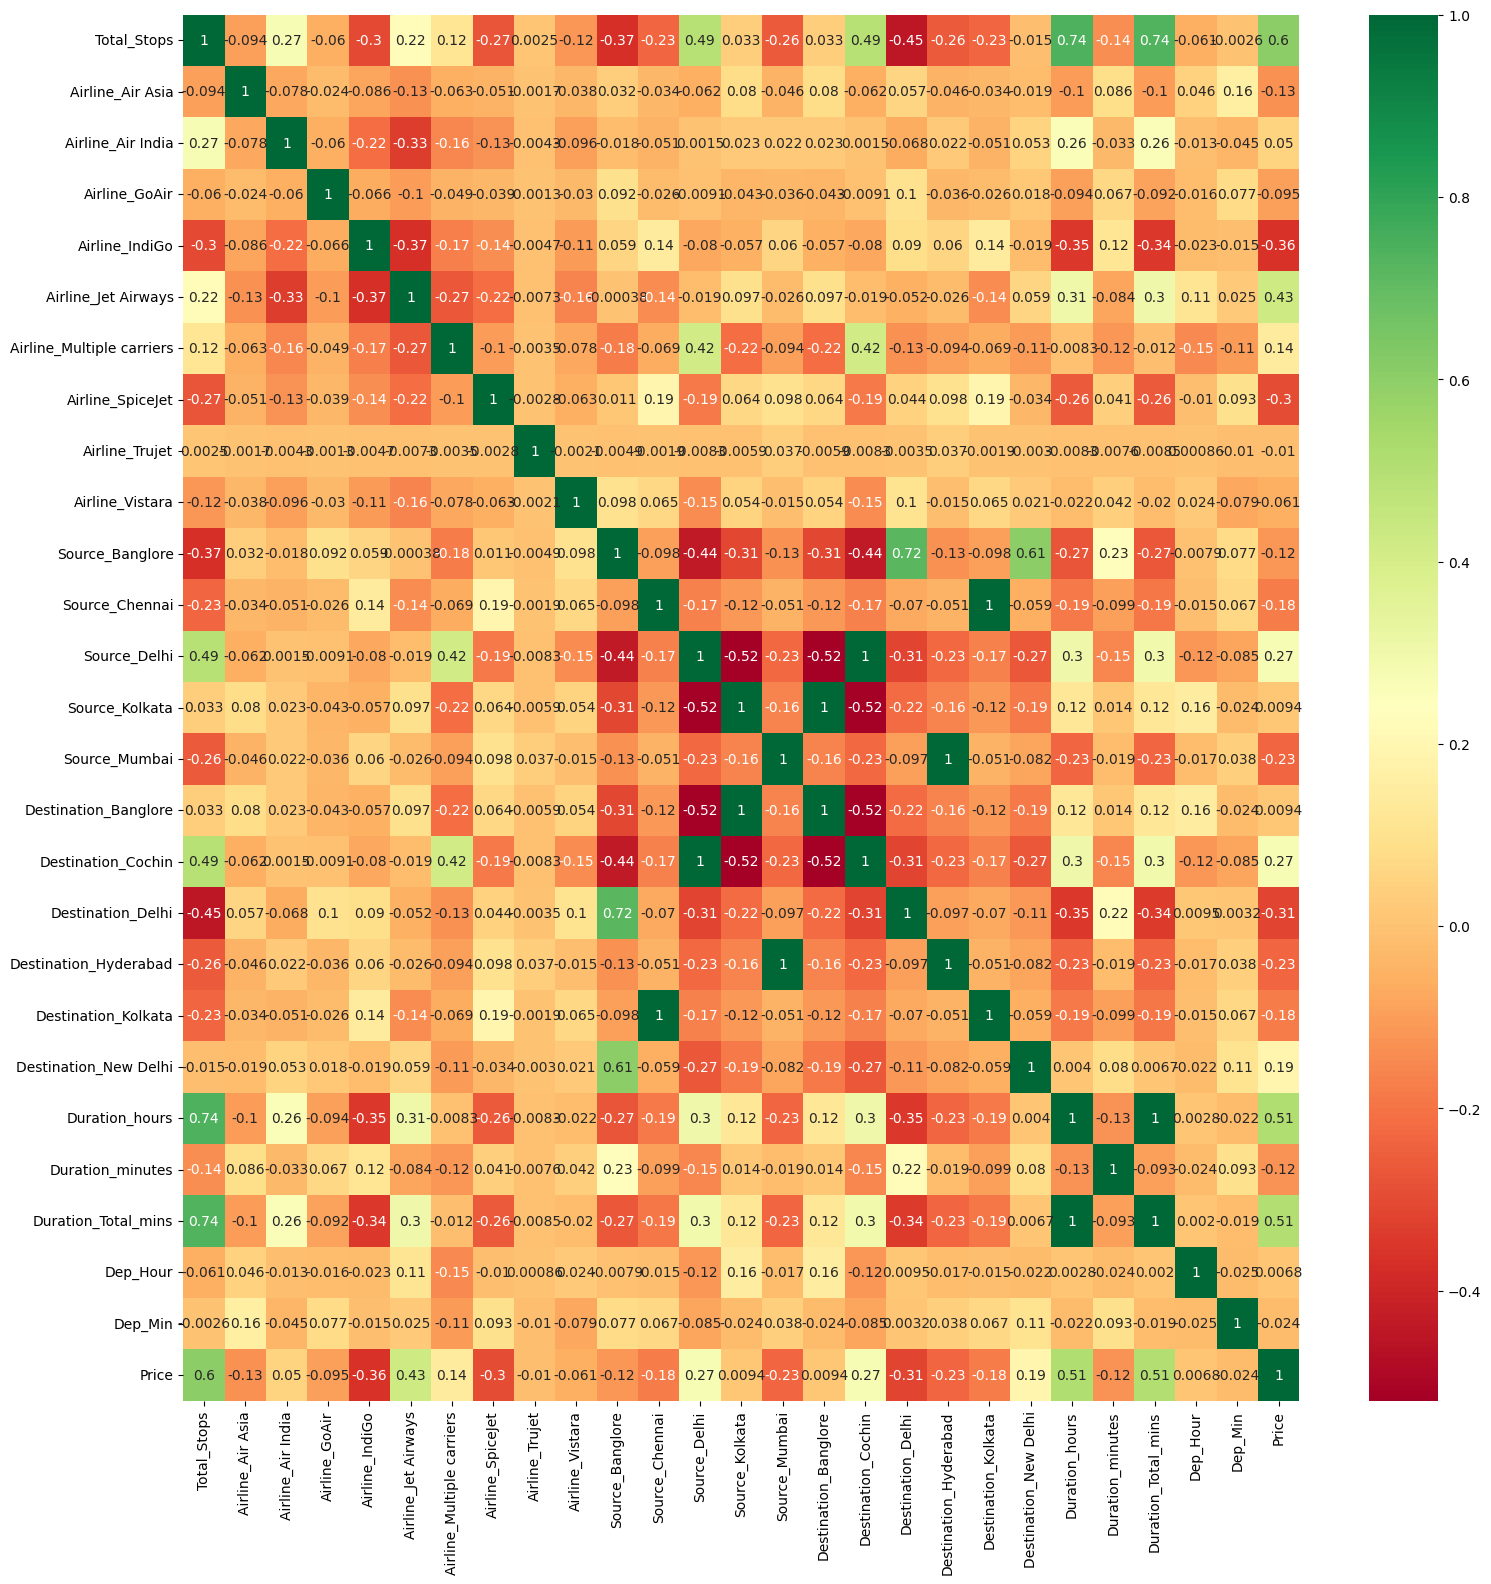

In [61]:
# Construct heatmap with newly formed dataframe
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

From the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other).


In [62]:
# Calculate correlation between all independent variables and the price
features = new_data.corr()['Price'].sort_values()
features

Airline_IndiGo              -0.361048
Destination_Delhi           -0.313401
Airline_SpiceJet            -0.296552
Source_Mumbai               -0.230745
Destination_Hyderabad       -0.230745
Destination_Kolkata         -0.179216
Source_Chennai              -0.179216
Airline_Air Asia            -0.133044
Duration_minutes            -0.124874
Source_Banglore             -0.118026
Airline_GoAir               -0.095146
Airline_Vistara             -0.060503
Dep_Min                     -0.024492
Airline_Trujet              -0.010380
Dep_Hour                     0.006819
Source_Kolkata               0.009377
Destination_Banglore         0.009377
Airline_Air India            0.050346
Airline_Multiple carriers    0.141087
Destination_New Delhi        0.189785
Source_Delhi                 0.270619
Destination_Cochin           0.270619
Airline_Jet Airways          0.428490
Duration_Total_mins          0.506371
Duration_hours               0.508672
Total_Stops                  0.603897
Price       

<Axes: >

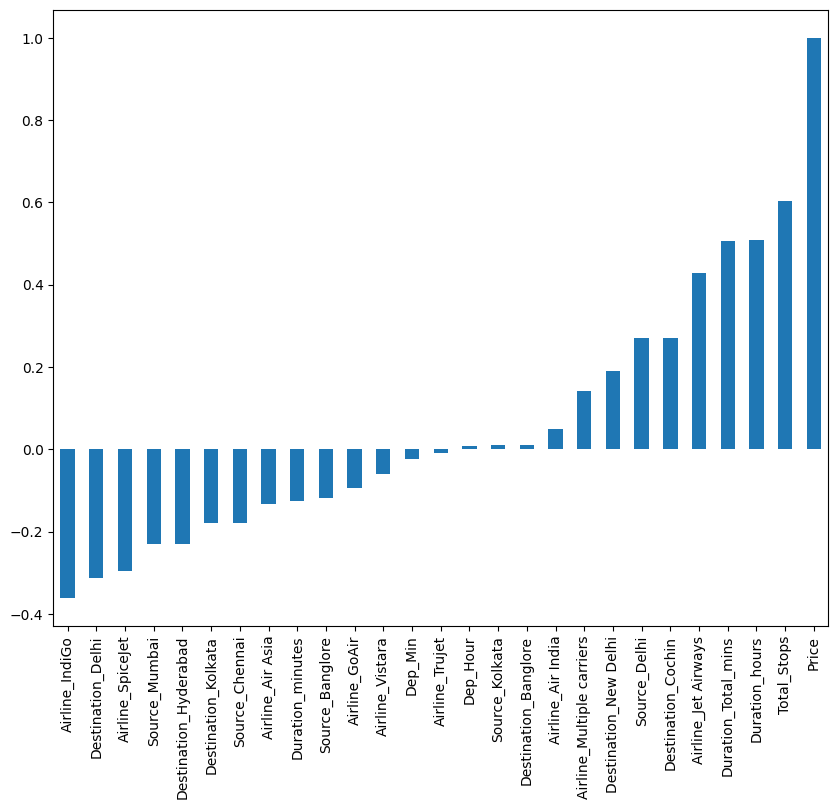

In [63]:
# Plot correlation coefficients
features.plot(kind='bar',figsize=(10,8))